In [11]:
%load_ext autoreload
%autoreload 2

from context import uncertify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import logging
from uncertify.log import setup_logging
setup_logging()
LOG = logging.getLogger(__name__)

# Matplotlib DEBUG logging spits out a whole bunch of crap
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [13]:
import torch
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [ ]:
def kl_divergence(p, q):
    return np.mean(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
x = np.arange(-10, 10, 0.5)
p = norm.pdf(x, 0, 1)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p, '.')
plt.plot(x, q, '.', c='red')

In [ ]:
t = torch.Tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
t

In [36]:
t.shape

NameError: name 't' is not defined

In [ ]:
t.mean(dim=(1))

In [ ]:
mu = t
log_var = t

In [ ]:
torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0)

In [ ]:
1 + log_var - mu ** 2 - log_var.exp()

In [ ]:
torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1)

In [ ]:
torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0) 

In [ ]:
torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

In [ ]:
1 + log_var - mu.pow(2) - log_var.exp()

In [ ]:
from sklearn import metrics
import scikitplot as skplt

In [ ]:
y_true = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]

cm = metrics.confusion_matrix(y_true, y_pred)
skplt.metrics.plot_confusion_matrix(y_true, y_pred)

In [ ]:
torch.normal(mean=0, std=torch.ones((10, 128, )))

In [ ]:
a = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.]])
a

In [ ]:
torch.mean(a, dim=1)

In [ ]:
n_latent_samples = 16
latent_space_dim = 128
latent_samples = torch.normal(mean=0, std=torch.ones((n_latent_samples, latent_space_dim, )))

In [1]:
import nibabel as nib

In [4]:
x = nib.load("/media/juniors/TOSHIBA EXT/Masterarbeit/datasets/raw/CamCAN/T2w/sub-CC610671_T2w_unbiased.nii.gz").get_fdata()

In [5]:
x.shape

(197, 233, 189)

In [22]:
import torch
import matplotlib.pyplot as plt

In [30]:
from torch.utils.data import DataLoader

In [33]:
from uncertify.data.datasets import GaussianNoiseDataset

In [34]:
noise_set = GaussianNoiseDataset()
loader = DataLoader(noise_set)

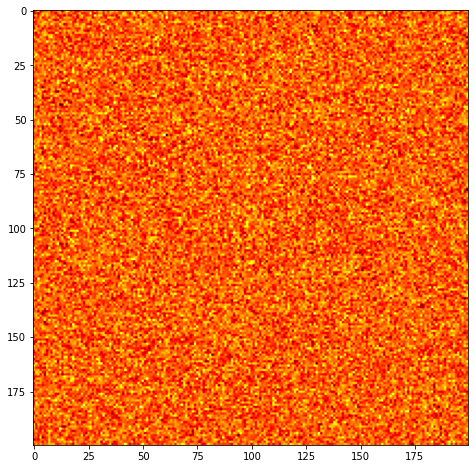

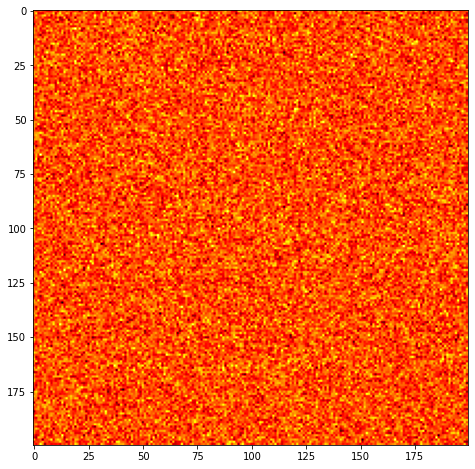

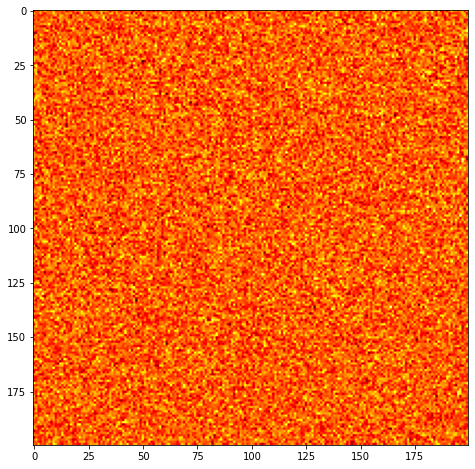

In [35]:
for item in loader:
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.imshow(noise_set[0]['scan'].numpy(), cmap='hot')

In [32]:
loader = DataLoader(noise_set)

In [37]:
import numpy as np

In [39]:
a = np.array([np.nan, 0, 1])

In [42]:
np.isnan(a).any()

True